# Part 1: Logistic regression

## Linear regression works well when the target column we're trying to predict, the dependent variable, is ordered and continuous. If the target column instead contains distrete values, then linear regression isn't a good fit.

## Classification problems. 
* In calssification, the target column has a finite set of possible values which represent different categories a row can belong to.

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 99
import matplotlib.pyplot as plt
%matplotlib inline

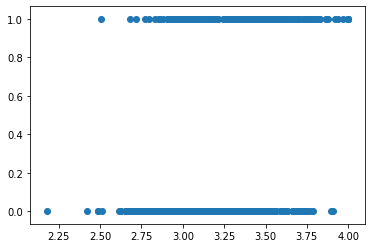

In [2]:
admissions = pd.read_csv('admissions.csv')
plt.scatter(admissions['gpa'], admissions['admit'])

In [3]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   644 non-null    int64  
 1   gpa     644 non-null    float64
 2   gre     644 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


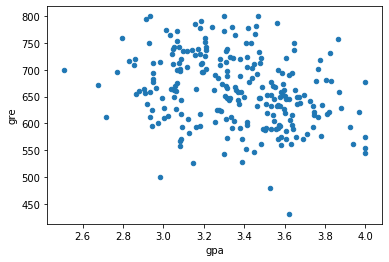

In [4]:
admissions[admissions['admit'] == 1].plot('gpa', 'gre', kind = 'scatter')

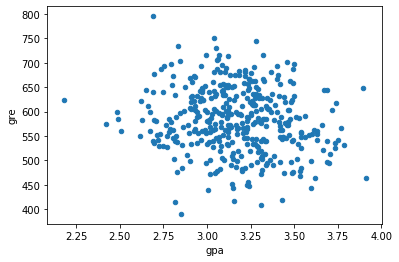

In [5]:
admissions[admissions['admit'] == 0].plot('gpa', 'gre', kind = 'scatter')

* When numbers are used to represent different options or categories, they are referred to as **categorical values**. 
* Classification focuses on estimating the relationship between the independent variables and the dependent, **categorical variable**.

***
## Logistic regression
A logistic regression model outputs a probability value. According the probability assigned binary code 0 or 1

## Logistic function, which is a version of the linear function that is adapted for classification.

## $\sigma(t) = \frac{e^t}{1 + e^t}$

## The logistic function is broken up into 2 key parts:
   * The exponential transformation, transforming all values to be positive : **$e^t$**
   * The normalization transformation, transforming all values to range between 0 and 1: $\frac{t}{t+1}$

In [6]:
# Logistic function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e~=2.71828
    return np.exp(x) / (1 + np.exp(x))

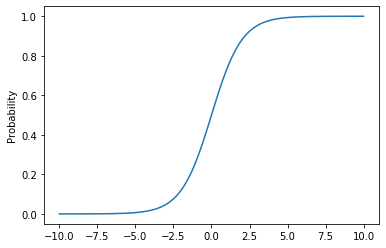

In [7]:
x = np.linspace(-10,10,100, dtype = float)

y = logistic(x)

plt.plot(x,y)
plt.ylabel('Probability')
plt.show()

## sklearn.linear_model.LinearRegression, sklearn.linear_model.LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(admissions[['gpa']], admissions['admit'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[['gpa']], admissions['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
probabilities = logistic_model.predict_proba(admissions[['gpa']])
probabilities

array([[0.66343633, 0.33656367],
       [0.53967962, 0.46032038],
       [0.84160275, 0.15839725],
       ...,
       [0.69368514, 0.30631486],
       [0.46457162, 0.53542838],
       [0.47350995, 0.52649005]])

Text(0, 0.5, 'Probability admit')

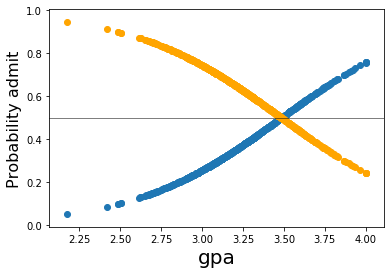

In [11]:
pred_probs = logistic_model.predict_proba(admissions[['gpa']])
plt.scatter(admissions['gpa'], pred_probs[:,1])
plt.scatter(admissions['gpa'], pred_probs[:, 0], color = 'orange')
plt.axhline(0.5, color = 'black', lw = 0.5)
plt.xlabel('gpa', fontsize=20)
plt.ylabel('Probability admit', fontsize = 16)

This is because logistic regression is really just an adapted version of linear regression for classification problems. Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable

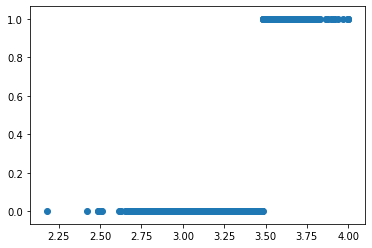

In [12]:
fitted_labels = logistic_model.predict(admissions[['gpa']])
plt.scatter(admissions['gpa'], fitted_labels)

# Part 2: Introduction to evaluating binary classifiers

In [13]:
admissions = pd.read_csv('admissions.csv')
model = LogisticRegression()
model.fit(admissions[['gpa']], admissions['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
labels = model.predict(admissions[['gpa']])

admissions['predicted_label'] = labels
print(admissions['predicted_label'].value_counts())
print(admissions.head())

0    507
1    137
Name: predicted_label, dtype: int64
   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


In [15]:
admissions[admissions['admit'] != admissions['predicted_label']]

,admit,gpa,gre,predicted_label
5,0,3.599108,442.763567,1
8,0,3.562482,590.340371,1
9,0,3.910495,463.470183,1
20,0,3.520870,534.127500,1
36,0,3.531761,478.948891,1
...,...,...,...,...
637,1,3.440105,702.458099,0
638,1,3.257304,689.773376,0
639,1,3.381359,720.718438,0
640,1,3.083956,556.918021,0


## $Accuracy = \frac{\text{# of Correctly Predicted}}{\text{# of Observations}}$

## Discriminatin threshold: larger to 1, less than then to 0, default is 0.5

In [16]:
admissions.rename(columns={'admit':'actual_label'}, inplace=True)
admissions.sample(5)

,actual_label,gpa,gre,predicted_label
566,1,3.576925,648.411777,1
568,1,3.004008,610.556794,0
420,1,3.274542,625.609795,0
360,0,3.184187,683.380600,0
571,1,3.205237,752.190874,0


In [17]:
matches = admissions['predicted_label'] == admissions['actual_label']
correct_predictions = admissions[matches]
correct_predictions.head()

,actual_label,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0


In [18]:
accuracy = len(correct_predictions) / len(admissions)
accuracy

0.6847826086956522

In [19]:
matches.sum() / len(admissions)

0.6847826086956522

## 4 different outcoms of a binary classification model according to result of Prediction (0,1) and actual Observation (0,1), 0 reject student, 1 admited student: (Prediction, Observation)

## True Positive (1,1, TP), False Positive (1, 0, FP), False Negative (0, 1, FN), True Negative (0, 0, TN)


In [20]:
true_positives = ((admissions['predicted_label'] == 1) & (admissions['actual_label'] == 1)).sum()
true_negatives = ((admissions['predicted_label'] == 0) & (admissions['actual_label'] == 0)).sum()

print(true_positives, true_negatives)

89 352


## Sentitivity or True Positive Rate (TPR)
## $TPR = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$

## TPR answers the question that How effective is the model at identifying positive outcomes.

In [21]:
true_positive_filter = (admissions['predicted_label'] == 1) & (admissions['actual_label'] == 1)
true_positives = true_positive_filter.sum()
false_negative_filter = (admissions['predicted_label'] == 0) & (admissions['actual_label'] == 1)
false_negatives = false_negative_filter.sum()
sensitivity = true_positives / (true_positives + false_negatives)

In [22]:
sensitivity

0.36475409836065575

## Specificity or True Negative Rate:
## $TNR = \frac{\text{True Negatives}}{\text{False Positives} + \text{True Negatives}}$
## TNR answers the question that How effective is the model at identifying negative outcomes

In [23]:
true_negative_filter = (admissions['predicted_label'] == 0) & (admissions['actual_label'] == 0)
true_negatives = len(admissions[true_negative_filter])

false_positive_filter = (admissions['predicted_label'] == 1) & (admissions['actual_label'] == 0)
false_positives = admissions[false_positive_filter].shape[0]

specificity = true_negatives / (false_positives + true_negatives)

specificity

0.88

# Part 3: Multiclass classification

##  Predict car maker

In [24]:
cars = pd.read_csv('auto.csv')
cars.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
119,19.0,4,121.0,112.0,2868.0,15.5,73,2
41,12.0,8,383.0,180.0,4955.0,11.5,71,1
91,13.0,8,351.0,158.0,4363.0,13.0,73,1
237,30.0,4,97.0,67.0,1985.0,16.4,77,3
163,20.0,8,262.0,110.0,3221.0,13.5,75,1


In [25]:
unique_regions = cars.origin.unique()
unique_regions

array([1, 3, 2])

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


* For this dataset, categorical variable exist in three columns: cylinders, year and origin
* **Must use dummy variables for columns containing categorical values!!**

In [27]:
dummy_df = pd.get_dummies(cars['cylinders'], prefix = 'cyl')
dummy_df.head()

,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [28]:
cars = pd.concat([cars, dummy_df], axis = 1)
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,0,0,1


In [29]:
dummy_years = pd.get_dummies(cars['year'], prefix = 'year')
cars = pd.concat([cars, dummy_years], axis = 1)

cars = cars.drop(['year', 'cylinders'], axis = 1)
cars.head()

,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
0,18.0,307.0,130.0,3504.0,12.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693.0,11.5,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436.0,11.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433.0,12.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449.0,10.5,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
cars.origin.value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

## One-versus-all method
* A technique where we choose a single category as the Positive case and group the rest of the categories as the False cse. We are essentially splitting the problem into multiple binary classification problems. For each observation, the model will then output the probability of belonging to each category.

In [31]:
shuffled_rows = np.random.permutation(cars.index)
shuffled_cars = cars.loc[shuffled_rows]
shuffled_cars.head()

,mpg,displacement,horsepower,weight,acceleration,origin,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8,year_70,year_71,year_72,year_73,year_74,year_75,year_76,year_77,year_78,year_79,year_80,year_81,year_82
196,33.0,91.0,53.0,1795.0,17.4,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
290,18.5,360.0,150.0,3940.0,13.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
217,25.5,122.0,96.0,2300.0,15.5,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
137,14.0,302.0,140.0,4638.0,16.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
186,16.0,318.0,150.0,4190.0,13.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
cutoff = int(shuffled_cars.shape[0] * 0.7)
train = shuffled_cars[:cutoff]
test = shuffled_cars[cutoff:]

In [33]:
from sklearn.linear_model import LogisticRegression

unique_origins = cars['origin'].unique()
unique_origins.sort()

models = {}
unique_origins

array([1, 2, 3])

In [34]:
features = [col for col in shuffled_cars.columns if (col.startswith('cyl') or col.startswith('year'))]

for value in unique_origins:
    model = LogisticRegression()
    ## Need to instantiate a new LogisticRegression object!!!!!!!!!!!!!!!!!!!!!!!!!!!
    X = train[features]
    y = train['origin'] == value
    model.fit(X,y)
    models[value] = model

In [35]:
testing_probs = pd.DataFrame(columns=unique_origins)

In [36]:
for value in unique_origins:
    testing_probs[value] = models[value].predict_proba(test[features])[:, 1]
    
testing_probs

,1,2,3
0,0.333784,0.211560,0.446788
1,0.962477,0.026648,0.022914
2,0.403489,0.319698,0.255328
3,0.857594,0.072401,0.076014
4,0.978415,0.009684,0.030953
...,...,...,...
113,0.333784,0.211560,0.446788
114,0.279349,0.355084,0.367406
115,0.403489,0.319698,0.255328
116,0.314065,0.370050,0.306253


## DataFrame.idxmax(axis = 1)

In [37]:
## iaxmax()
predicted_origins = testing_probs.idxmax(axis = 1)
predicted_origins

0      3
1      1
2      1
3      1
4      1
      ..
113    3
114    3
115    1
116    2
117    1
Length: 118, dtype: int64

In [38]:
def get_column_name(row):
    max_number = row.max()
    for index in row.index:
        if row.loc[index] == max_number:
            return index
testing_probs.apply(get_column_name, axis = 1)

0      3
1      1
2      1
3      1
4      1
      ..
113    3
114    3
115    1
116    2
117    1
Length: 118, dtype: int64

In [39]:
testing_probs

,1,2,3
0,0.333784,0.211560,0.446788
1,0.962477,0.026648,0.022914
2,0.403489,0.319698,0.255328
3,0.857594,0.072401,0.076014
4,0.978415,0.009684,0.030953
...,...,...,...
113,0.333784,0.211560,0.446788
114,0.279349,0.355084,0.367406
115,0.403489,0.319698,0.255328
116,0.314065,0.370050,0.306253


# Part 4: Overfitting

In [41]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 
          'model year', 'origin', 'car name']
cars = pd.read_table('auto-mpg.data', delim_whitespace=True, names = columns)
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

filtered_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [43]:
filtered_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## bias and variance.

## Bias and variance make up the 2 observable sources of errors in a model that we can indirectly control.

## *Bias* describes error that results in bad assumptions about the learning algorithm.

## *Variance* describes error that occurs because of the variability of a model's predicted value.

* If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have *low bias but high variance*.

<img src = '2xqTu46.png'>

* While an extremely simple, univariate linear regression model will underfit, an extremely complicted, multivariate linear regression model will overfit.

## In machine learning, the ideal algorithm has **low bias** and can accurately model the true relationship, and it has **low variability**, by producing consistent predictions across different datasets!
<img src = 'Describing+Sampling+Distributions.jpg'>

In [50]:
from sklearn.metrics import mean_squared_error
def train_and_test(cols):
    features = filtered_cars[cols]
    target = filtered_cars['mpg']
    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)
    mse = mean_squared_error(filtered_cars['mpg'], predictions)
    variance = np.var(predictions)
    
    return (mse, variance)

cyl_mse, cyl_var = train_and_test(['cylinders'])

weight_mse, weight_var = train_and_test(['weight'])

In [51]:
print(cyl_mse, cyl_var)
print(weight_mse, weight_var)

24.02017956815553 36.74255887416017
18.6766165974193 42.08612184489641


In [53]:
cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
mse_var = []
for i in range(1, len(cols) + 1):
    features_cols = cols[:i]
    mse_var.append(train_and_test(features_cols))


In [54]:
mse_var

[(24.02017956815553, 36.74255887416017),
 (21.282057055586364, 39.480681386729316),
 (20.252954839714228, 40.509783602601445),
 (17.763860571843846, 42.99887787047185),
 (17.76139610540622, 43.001342336909396),
 (11.590170981415227, 49.172567460900346),
 (10.847480945000454, 49.915257497315146)]

## A good way to dectect if the model is overfitting is to compare the in-sample error and out-of-sample error, or the training error with the test error.

In [78]:
from sklearn.model_selection import KFold
def train_and_cross_val(cols):
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    total_mse, total_var = 0, 0
    for train_index, test_index in kf.split(filtered_cars.index):
        model = LinearRegression()
        train = filtered_cars.iloc[train_index]
        test = filtered_cars.iloc[test_index]
        model.fit(train[cols], train['mpg'])
        predictions = model.predict(test[cols])
        mse = mean_squared_error(test['mpg'], predictions)
        var = np.var(predictions)
        total_mse += mse
        total_var += var
    return total_mse/10, total_var/10

In [79]:
cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
mse_var = []
for i in range(2, len(cols) + 1):
    features_cols = cols[:i]
    
    mse_var.append(train_and_cross_val(features_cols))

In [80]:
mse_var

[(21.584370274954374, 38.90252531375602),
 (20.655622193882955, 40.091287956606934),
 (18.169683239081888, 42.5076436436444),
 (18.283038517172052, 42.59873630014678),
 (12.099685425467117, 48.92824696771804),
 (11.418131971812052, 49.90431373098729)]

During cross validation, the more features we added to the model, the lower the mean squared error got. This is a good sign and indicates that the model generalizes well to new data it wasn't trained on. As the mean squared error value went down, however, the variance of the predictions went up. This is to be expected, since the models with lower squared error values had higher model complexity, which tends to be more sensitive to small variations in input values (or high variance).

In [81]:
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

In [87]:
error_df = pd.DataFrame(columns=['number of features', 'mse', 'variance'])
error_df['number of features'] = np.arange(2,8)
error_df['mse'] = np.array([two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse])
error_df['variance'] = np.array([two_var, three_var, four_var, five_var, six_var, seven_var])

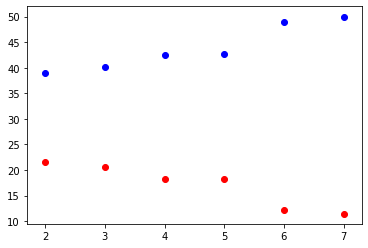

In [88]:
plt.scatter(error_df['number of features'], error_df['mse'], color = 'red')
plt.scatter(error_df['number of features'], error_df['variance'], color = 'blue')